# Projet appartment-hunter - La plateforme

## Project Introduction

Développement d'un outil visant à estimer la valeur de biens immobiliers à partir des charactéristiques d'un lot.

## Roadmap for appartment-hunter project

**A voir sur le github svp**
### Infos
#### Project members :
Julien Ract-Mugnerot
Pierre-Alexis Lebair

#### Used computers :
Asus Zenbook Duo


### Steps
1. find friends
- find friends 2y
2. data
- fetch data 5mn
- first data observation 30mn
- Choose a csv : 15mn
3. roadmap
- Create a roadamap 45mn
4. ressources management
- Create Github 15mn
- Create Trello 15mn
- Share Tasks 1h
5. Preprocessing
- Project Introduction 10mn
- Complete Data Exploration w/ visualisation 4h
- Data Cleaning  2h (Duplicates, Outliers, Scaling eventually ...)
- find imputations solutions 1h

6. Exploratory Power BI Analysis
- Idk 4h
- Pdf export 15mn

7. Stay up to date with technology - Linear Regression
**Inside Readme**
**Use IMGS**
- def regression algorythm 15mn
- def model 1 10mn
- def model 2 10mn
- def model 3 10mn

8. Feature Analysis and Selection
- Explore options (Boruta, forward feature selection, ...) 1h
- feature Analysis 45mn
- Feature Selection 30mn

9. Train 3 models and evaluate their performance

- train model 1 10mn
- train model 2 10mn
- train model 3 10mn

10. Grid search

- Grid Search 2h
- Result interpretation 20mn
- Model Final 1h
- Project's conclusion

11. Flask
- Create basic Flask App 1h
- Add random appart to App 30mn

12. Docker Script
- Docker 1h15



100. Project Delivery
- Create Readme 1mn
- Create Notebook 1mn
- Make presentation 4h
**


- Make basic App 1h
- Add random appart to App 30mn


- Maintain Readme 3h
- Maintain requirements.txt 10mn


101. Extra

Do presentation in reveal.js 12h
Export Docker To aws 3h


## Imports

In [247]:
!pip install missingno

In [248]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import joblib

# import os

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns
# import lime
# import lime.lime_tabular

# import missingno as msno
# from scipy.stats import f_oneway, chi2_contingency

# from sklearn.impute import KNNImputer, SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

# from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn import metrics

# from sklearn.metrics import mean_squared_error, make_scorer, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# import joblib
# import pickle

# from fonctions import *
# import warnings

# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.options.mode.chained_assignment = None
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=UserWarning)


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Palette

In [249]:

orange = "#FFA500"
purple = "#800080"
grey = "#808080"

custom_palette = ["#FFA500", "#FF8C00", "#FF5500", "#FF2200", "#800040", "#400080", "#800080", "#808080", "#808080"]

sns.set_palette(custom_palette)


In [250]:
pd.set_option('display.max_columns', None)

In [251]:
full_df = pd.read_csv('data/houses_Madrid.csv')
small_df = pd.read_csv('data/kc_house_data.csv')

## Data Exploration

In [252]:
full_df.head(1)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False


In [253]:
full_df.shape

(21742, 58)

In [254]:
small_df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [255]:
small_df.shape

(21613, 21)

We already observe a difference in features amount between the two datasets available, and that the df with the lesser number of features isn't necessary better with already pre-treated data. So we got a preference for now but we got to dig further  to verify that the bigger dataset does not have too many unusable features, and is worth using over the first one.

### Deciding between the two datasets

#### Exploring the smaller dataset

In [256]:
small_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [257]:
small_df.duplicated().sum()

0

We take a first look at the features availables throught their types.

In [258]:
small_df.dtypes.value_counts().index

Index([int64, float64, object], dtype='object')

In [259]:
small_df.select_dtypes(include=['object']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB


In [260]:
small_df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  int64
 1   bedrooms       21613 non-null  int64
 2   sqft_living    21613 non-null  int64
 3   sqft_lot       21613 non-null  int64
 4   waterfront     21613 non-null  int64
 5   view           21613 non-null  int64
 6   condition      21613 non-null  int64
 7   grade          21613 non-null  int64
 8   sqft_above     21613 non-null  int64
 9   sqft_basement  21613 non-null  int64
 10  yr_built       21613 non-null  int64
 11  yr_renovated   21613 non-null  int64
 12  zipcode        21613 non-null  int64
 13  sqft_living15  21613 non-null  int64
 14  sqft_lot15     21613 non-null  int64
dtypes: int64(15)
memory usage: 2.5 MB


In [261]:
small_df.select_dtypes(include=['int64']).info('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  int64
 1   bedrooms       21613 non-null  int64
 2   sqft_living    21613 non-null  int64
 3   sqft_lot       21613 non-null  int64
 4   waterfront     21613 non-null  int64
 5   view           21613 non-null  int64
 6   condition      21613 non-null  int64
 7   grade          21613 non-null  int64
 8   sqft_above     21613 non-null  int64
 9   sqft_basement  21613 non-null  int64
 10  yr_built       21613 non-null  int64
 11  yr_renovated   21613 non-null  int64
 12  zipcode        21613 non-null  int64
 13  sqft_living15  21613 non-null  int64
 14  sqft_lot15     21613 non-null  int64
dtypes: int64(15)
memory usage: 2.5 MB


In [262]:
full_df['buy_price'].isna().sum()

0

In [263]:
percentage_missing = small_df.isnull().sum().sort_values(ascending = False)/small_df.shape[0]*100
print(f"{percentage_missing[percentage_missing<30].count()} beneficial features")
percentage_missing[percentage_missing<30]

21 beneficial features


id               0.0
grade            0.0
sqft_living15    0.0
long             0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64

We observe that amongst all 21 features of the dataset none of them are missing any value, this could indicate a high data quality, this will certainly be the deciding factor in choosing a dataset

#### Exploring the dataset with the most features

In [264]:
full_df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,0.0,0.0,2.174200e+04,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,NaN,NaN,-5.917031e+04,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,NaN,NaN,9.171162e+05,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.459028e+07,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,7.250000e+02,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,NaN,NaN,1.116000e+03,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,NaN,NaN,1.687000e+03,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


In [265]:
full_df.duplicated().sum()

0

We take a first look at the features availables throught their types.

In [266]:
full_df.dtypes.value_counts().index

Index([object, float64, int64, bool], dtype='object')

In [267]:
full_df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         21742 non-null  int64
 1   id                 21742 non-null  int64
 2   n_rooms            21742 non-null  int64
 3   rent_price         21742 non-null  int64
 4   buy_price          21742 non-null  int64
 5   buy_price_by_area  21742 non-null  int64
dtypes: int64(6)
memory usage: 1019.3 KB


In [268]:
full_df.select_dtypes(include=['O']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         21742 non-null  object
 1   subtitle                      21742 non-null  object
 2   raw_address                   16277 non-null  object
 3   street_name                   15837 non-null  object
 4   street_number                 6300 non-null   object
 5   floor                         19135 non-null  object
 6   is_floor_under                20572 non-null  object
 7   neighborhood_id               21742 non-null  object
 8   operation                     21742 non-null  object
 9   house_type_id                 21351 non-null  object
 10  is_new_development            20750 non-null  object
 11  has_central_heating           13608 non-null  object
 12  has_individual_heating        13608 non-null  object
 13  has_ac          

In [269]:
full_df.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sq_mt_built          21616 non-null  float64
 1   sq_mt_useful         8228 non-null   float64
 2   n_bathrooms          21726 non-null  float64
 3   n_floors             1437 non-null   float64
 4   sq_mt_allotment      1432 non-null   float64
 5   latitude             0 non-null      float64
 6   longitude            0 non-null      float64
 7   portal               0 non-null      float64
 8   door                 0 non-null      float64
 9   rent_price_by_area   0 non-null      float64
 10  built_year           10000 non-null  float64
 11  are_pets_allowed     0 non-null      float64
 12  is_furnished         0 non-null      float64
 13  is_kitchen_equipped  0 non-null      float64
 14  has_private_parking  0 non-null      float64
 15  has_public_parking   0 non-null     

In [270]:
full_df.select_dtypes(include=['bool']).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   is_exact_address_hidden  21742 non-null  bool 
 1   is_rent_price_known      21742 non-null  bool 
 2   is_buy_price_known       21742 non-null  bool 
 3   is_renewal_needed        21742 non-null  bool 
 4   has_parking              21742 non-null  bool 
dtypes: bool(5)
memory usage: 106.3 KB


Using msno to get the per feature count of values for the bigger dataset

<Axes: >

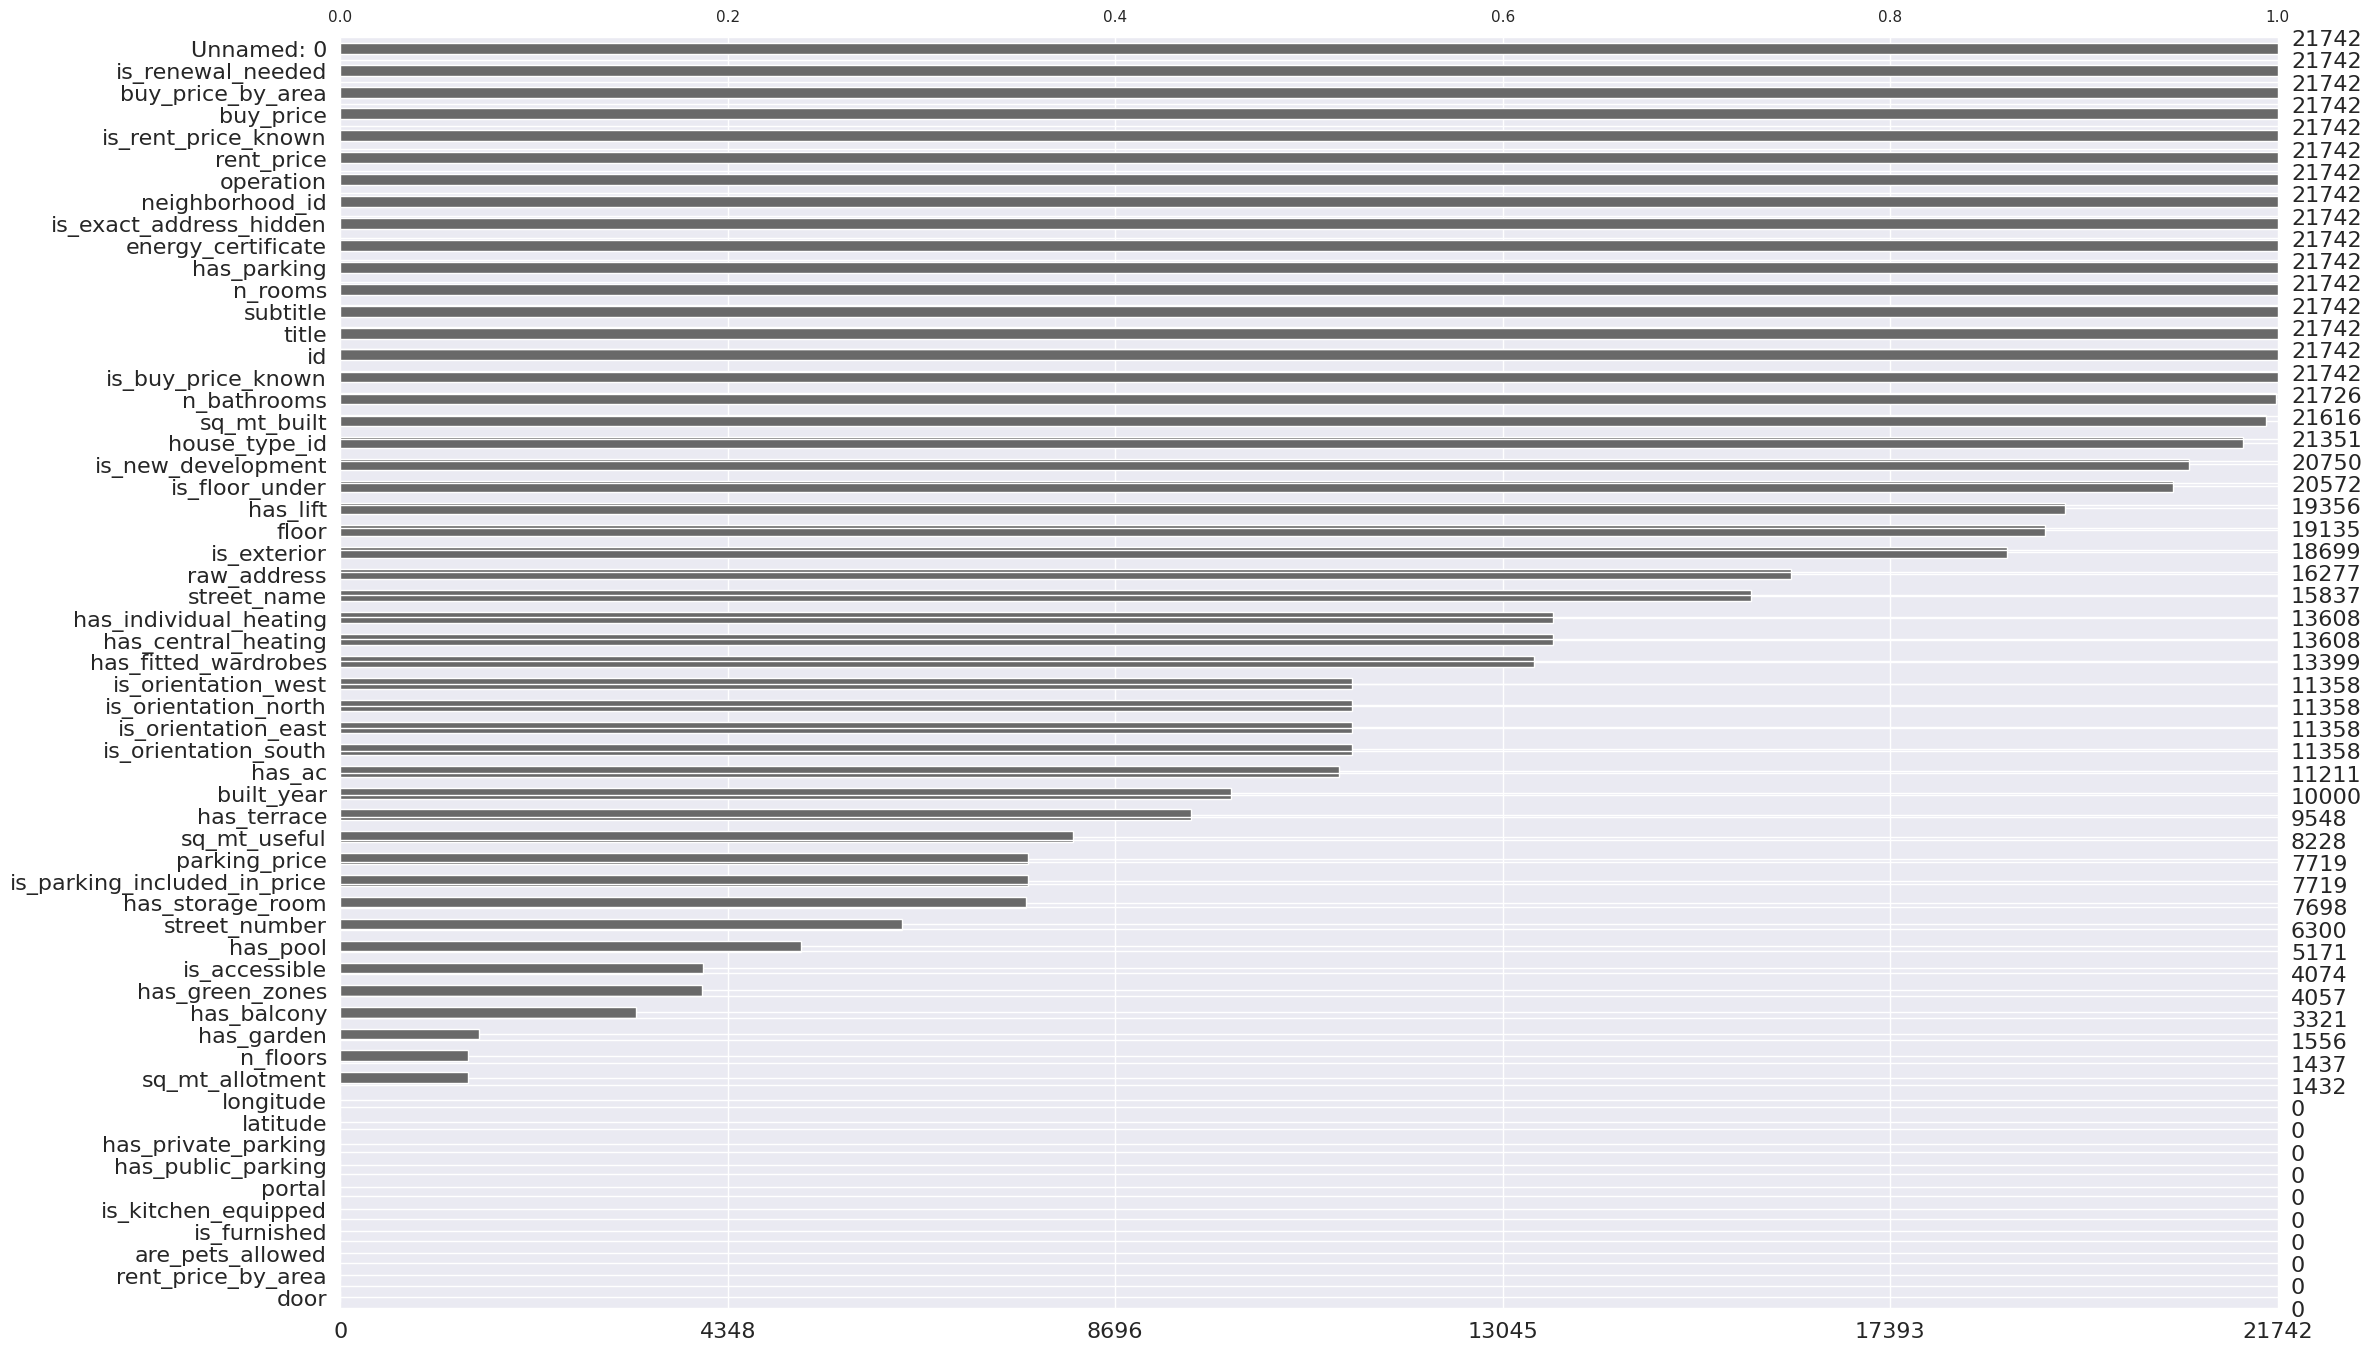

In [271]:
msno.bar(full_df, sort='ascending')

In [272]:
percentage_missing = full_df.isnull().sum().sort_values(ascending = False)/21742*100
print(f"{percentage_missing[percentage_missing<30].count()} valeurs exploitables")
percentage_missing[percentage_missing<30]

26 valeurs exploitables


street_name                27.159415
raw_address                25.135682
is_exterior                13.995953
floor                      11.990617
has_lift                   10.974151
is_floor_under              5.381290
is_new_development          4.562598
house_type_id               1.798363
sq_mt_built                 0.579524
n_bathrooms                 0.073590
energy_certificate          0.000000
has_parking                 0.000000
Unnamed: 0                  0.000000
id                          0.000000
is_buy_price_known          0.000000
buy_price_by_area           0.000000
buy_price                   0.000000
is_rent_price_known         0.000000
rent_price                  0.000000
operation                   0.000000
neighborhood_id             0.000000
is_exact_address_hidden     0.000000
n_rooms                     0.000000
subtitle                    0.000000
title                       0.000000
is_renewal_needed           0.000000
dtype: float64

In [273]:
percentage_missing

has_private_parking             100.000000
door                            100.000000
portal                          100.000000
is_furnished                    100.000000
rent_price_by_area              100.000000
longitude                       100.000000
latitude                        100.000000
has_public_parking              100.000000
is_kitchen_equipped             100.000000
are_pets_allowed                100.000000
sq_mt_allotment                  93.413669
n_floors                         93.390672
has_garden                       92.843345
has_balcony                      84.725416
has_green_zones                  81.340263
is_accessible                    81.262073
has_pool                         76.216539
street_number                    71.023825
has_storage_room                 64.593874
parking_price                    64.497286
is_parking_included_in_price     64.497286
sq_mt_useful                     62.156195
has_terrace                      56.084997
built_year 

We observe that amongst all 58 features of the dataset,  more than half of it (32) are missing 30% or more of their values.
Some of The remaining 26 features aren't necessarily relevant for a ML use case either like for exemple 'Unnamed: 0, street_name'

We could assume boolean vars with many missing values like has_pool or has_garden with only True values in it would be usable but it doesn't make sense to us that only 8% or these houses would have a garden while as many as 23.8% of houses would have a pool, so our confidence level on this dataset is running low.

Even the data description is of the lesser quality.
this probably indicate a lesser data quality, and at the same time not having access to values that appears to be relevant like 'buy_price_by_area' and 'parking_price' would be unfortunate.

#### Making a decision

While some features could matters a lot for our models, many uncertaintaies remain over the bigger dataset (full_df), as for exemple having more houses with pools than gardens, a lot of unexploitable features and some basic informations like the lot condition being missing.

While the smaller dataset(small_df) has no obvious missing values, classics but relevant features and has a very high trust index. 

So we will be choosing small_df over those previously mentionned reason.

### In-Depth Data Exploration

In [274]:
df = small_df

<!-- Lists of columns that appears to be fine without data cleaning :
- price -->

We'll be cleaning the Dataframe throught non categorical and non numerical features first with Id and date

#### Id

In [275]:
df[df['id'].duplicated(keep=False)].id.count()

353

In [276]:
print(f"{df[df['id'].duplicated(keep=False)].id.count()/21436*100}% of the dataset id values are duplicates (all duplicated lines included)")

1.6467624556820302% of the dataset id values are duplicates (all duplicated lines included)


In [277]:
# We
df[df['id'].duplicated(keep=False)].sort_values(by="id").iloc[20:46, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15300,705730280,20150421T000000,335000.0,3,2.50,1740,5267,2.0,0,0,3,7,1740,0,1999,0,98038,47.3777,-122.023,2180,5000
15299,705730280,20140819T000000,325000.0,3,2.50,1740,5267,2.0,0,0,3,7,1740,0,1999,0,98038,47.3777,-122.023,2180,5000
9275,722039087,20140923T000000,220500.0,2,1.00,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442
9276,722039087,20150504T000000,329000.0,2,1.00,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442
3785,723049156,20140523T000000,149000.0,3,1.00,1700,8645,1.0,0,0,3,6,1700,0,1955,0,98146,47.4899,-122.337,1500,7980
3786,723049156,20141112T000000,284700.0,3,1.00,1700,8645,1.0,0,0,3,6,1700,0,1955,0,98146,47.4899,-122.337,1500,7980
823,726049190,20141002T000000,287500.0,3,1.00,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
824,726049190,20150218T000000,431000.0,3,1.00,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
17602,795000620,20140924T000000,115000.0,3,1.00,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.330,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.00,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.330,1070,6250


We notice that those duplicates have the same values over other features like bedroom, condition, grade, but **the price** and **date** of the sell is always different, some of them suddenly dropping in value by more than half their price and some even increasing in value by twice or thrice their first listed sell price.

Those irregularities leads me to consider 4 possibilities :
- House has been bought and resold at the same agency by their new owner at differents times, but those "false duplicates" entries **always follow each others** in the dataset which is pretty curious when you consider values of the dataset have not been entered in a chronological order like it would most likely be the case in an archive
- Those are typing/software errors, which is pretty unlikely considering the whole dataset seems pretty clean.
- Those lot sells have been cancelled, and then resold at a later date. Which could be a decent option by process of elimination.

- **The agency when acquiring a lot, sometimes asks for acquisition document of the property, which gives them an additional entry in the dataframe, and the previous features of the dataset like the number of bathrooms are not known/asked from the previous sell, which would explain why none of the others values ever change except for the data and the price of the lots.**

The last option makes the most sense to us, since it fits the modus operandi of entering consecutively sells information of a same lot at a different date for a different price while ocasionally having very wide price gaps.

those seems to be legits sells, but modelling will have to be tested with and without those values. Dropping the first one and keeping the last entry would be the better option to avoid having the model making a potentially false correlation with the date variable, while changes over other features have not been tracked between the multiple sells and could explain the price evolution.

In [278]:
df = df[~df.duplicated(subset=['id'], keep='last')]


In [279]:
df[df.id== 1217000340]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12435,1217000340,20150219T000000,340000.0,3,1.0,1840,8100,1.0,0,0,4,7,920,920,1953,0,98166,47.455,-122.35,1250,8100


#### date

This will most likely be a determining feature, so we will transform it to an exploitable format.


In [280]:
df.date.dtypes

dtype('O')

In [281]:
df.loc[:, 'date'] = df['date'].apply(lambda x: x[:8])

In [282]:
df.loc[:, 'date']  = pd.to_datetime(df['date'], format='%Y%m%d')

In [283]:
df.date[0]

Timestamp('2014-10-13 00:00:00')

We'll now be cleaning numerical values

#### sqft_living

Text(0.5, 1.0, 'Distribution of sqft_living')

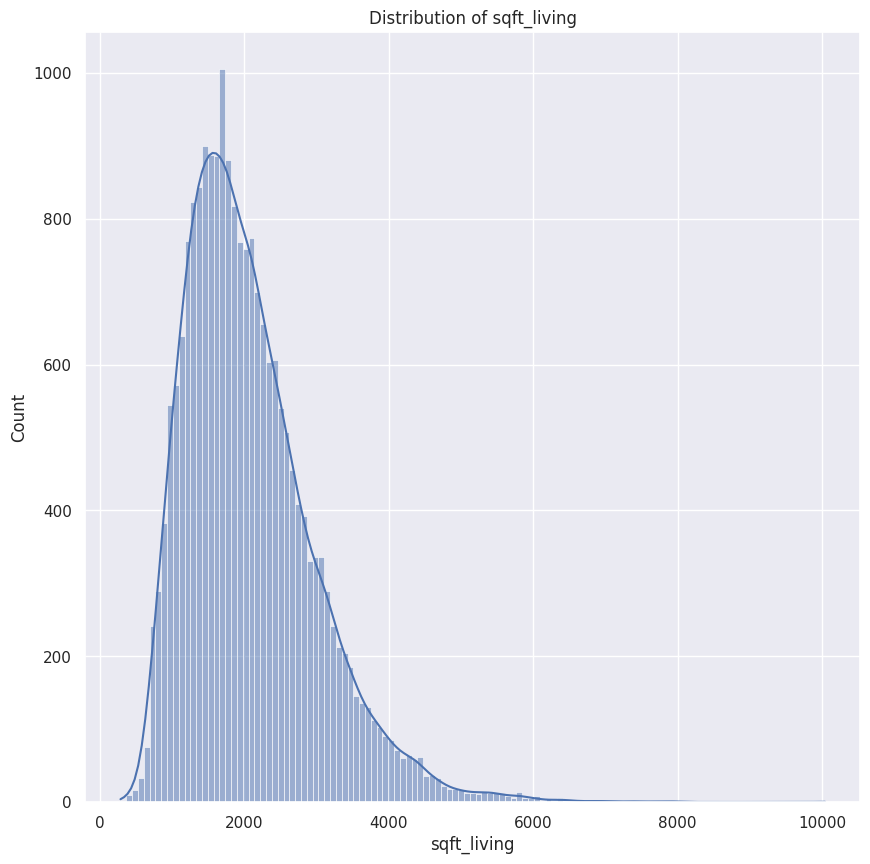

In [292]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10, 10))
sns.histplot(df["sqft_living"], label="sqft_living", kde=True)
plt.title("Distribution of sqft_living")

In [293]:
df.sqft_living[df.sqft_living > 5800].count()

57

In [295]:
df = df[df.sqft_living <= 5800]

#### sqft_lot

In [297]:
df[df["sqft_lot"] < 1500000].count()

id               21334
date             21334
price            21334
bedrooms         21334
bathrooms        21334
sqft_living      21334
sqft_lot         21334
floors           21334
waterfront       21334
view             21334
condition        21334
grade            21334
sqft_above       21334
sqft_basement    21334
yr_built         21334
yr_renovated     21334
zipcode          21334
lat              21334
long             21334
sqft_living15    21334
sqft_lot15       21334
dtype: int64

In [298]:
df = df[df["sqft_lot"] < 1500000]

Text(0.5, 1.0, 'Distribution of sqft_lot')

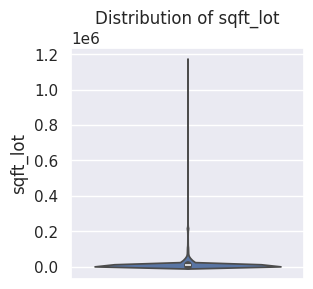

In [310]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(3, 3))
sns.violinplot(df["sqft_lot"])
plt.title("Distribution of sqft_lot")

We realize the distribution of this column is pretty unbalanced, we're taking a look at it's properties before deciding how to visualize and treat it

In [343]:
df.sqft_lot.describe()

count    2.044000e+04
mean     1.460306e+04
std      3.854660e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.500000e+03
75%      1.036000e+04
max      1.164794e+06
Name: sqft_lot, dtype: float64

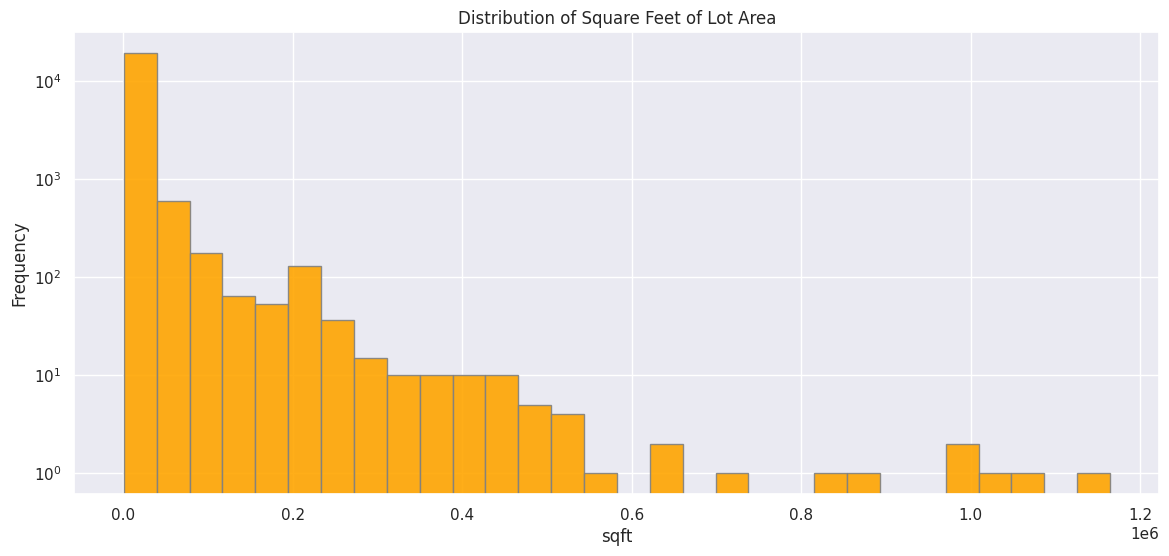

In [347]:

plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=30, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('sqft')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Square Feet of Lot Area')

plt.show()

We take a look at the max values of this feature, to see if there is sense in keeping a number of them.

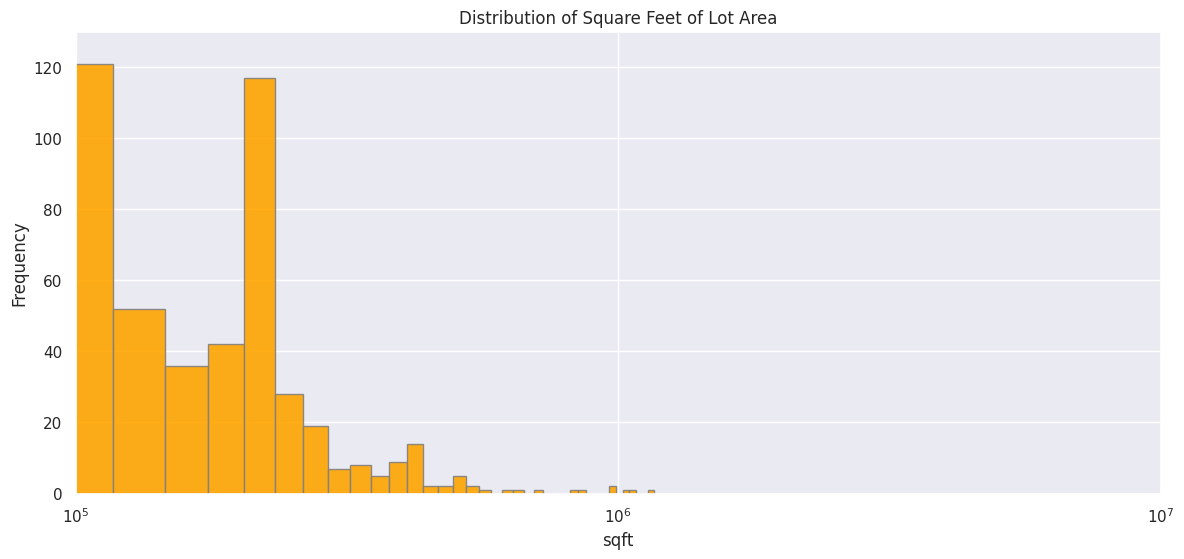

In [393]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=40, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('sqft')
plt.xscale('symlog')
plt.xlim(1e5, 1e7)

plt.ylabel('Frequency')
plt.yscale('linear')
plt.ylim(0, 130)

plt.title('Distribution of Square Feet of Lot Area')

plt.show()


Quick reminder, scale on 100k to 10M

In [401]:
df.sqft_lot[df['sqft_lot'] > 10**5.5].count()

58

We choose to only drop extreme outliers above 550k

In [403]:
df = df[df['sqft_lot'] <= 10**5.5]

#### bedrooms

In [ ]:
df.bedrooms.value_counts().sort_values(ascending=False)

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

We choose to drop the one extreme outlier which is thrice the value of the second highest value, this will help for a proper visualisation of the bedroom feature.

In [ ]:
df = df[df.bedrooms < 33]

In [ ]:
df.bedrooms.isna().sum()

0

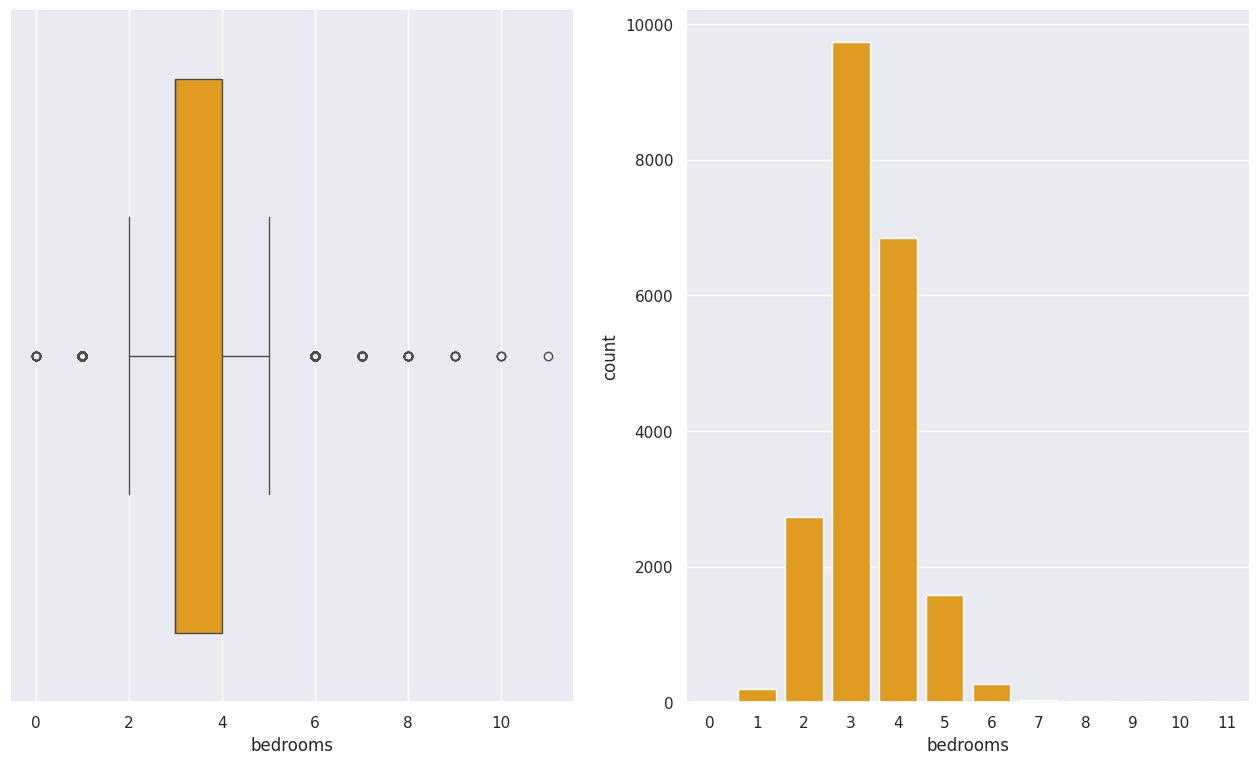

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
sns.boxplot(x='bedrooms', data=df, ax=axs[0])
sns.countplot(x='bedrooms', data=df, ax=axs[1])
plt.show()

0 is not that surprising of a value since a lot can be only one room, with kitchen and lounge integrated in one. It sounds reasonable to keeps those small outliers, that are decently scaled around the central distribution.

#### bathrooms

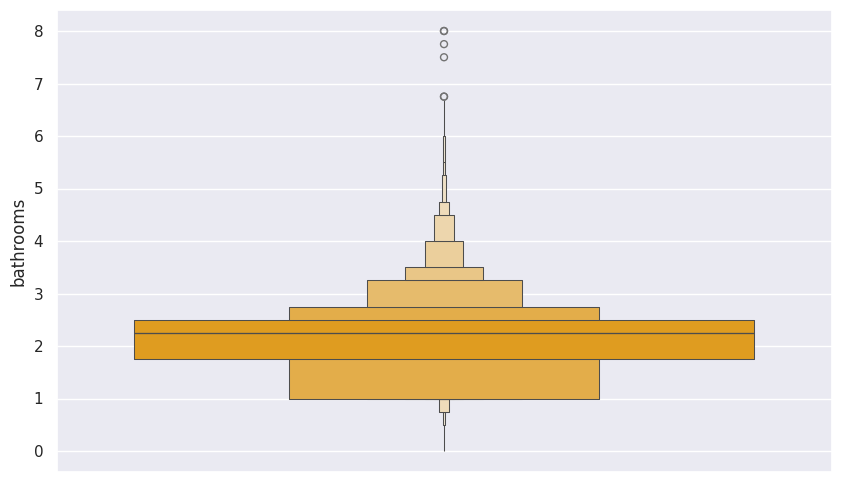

In [ ]:
df.bathrooms.value_counts()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='bathrooms')
plt.show()

In [ ]:
df.bathrooms[df.bathrooms < 1].count()

85

In [ ]:
df.bathrooms[df.bathrooms > 5].count()

43

We are dropping above 5 bathrooms to eliminate a part of the outliers without reducing the dataset too much.

In [ ]:
df = df[df.bathrooms <= 5]

#### floors

In [379]:
df.floors.value_counts()

floors
1.0    10363
2.0     7565
1.5     1818
3.0      574
2.5      113
3.5        7
Name: count, dtype: int64

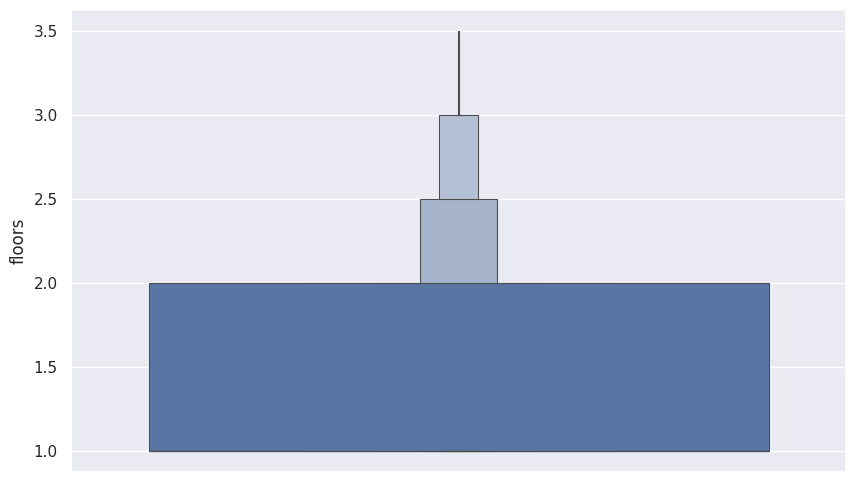

In [408]:
df.floors.value_counts()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='floors')
plt.show()

#### waterfront

#### view

#### condition

#### grade

In [380]:
df.grade.value_counts()

grade
7     8884
8     5952
9     2359
6     1994
10     813
5      234
11     166
4       29
12       5
3        3
1        1
Name: count, dtype: int64

#### lat

#### long

#### sqft_living15

#### sqft_lot15

#### price

In [301]:
df.price.describe()

count    2.133400e+04
mean     5.332789e+05
std      3.334440e+05
min      7.500000e+04
25%      3.230000e+05
50%      4.500000e+05
75%      6.400000e+05
max      3.850000e+06
Name: price, dtype: float64

In [302]:
df.price.sort_values(ascending = False)

2085     3850000.0
19017    3800000.0
16302    3710000.0
6508     3650000.0
18482    3650000.0
           ...    
2141       82500.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21334, dtype: float64

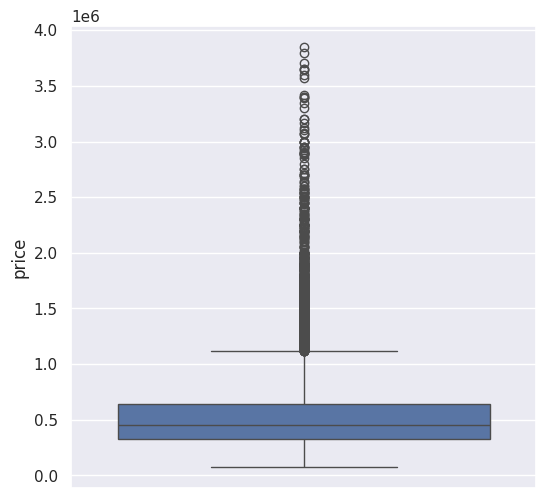

In [303]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='price', data=df)
plt.show()

In [304]:
df.loc[:, 'price'][df.price > 1200000].count()

894

Since we are aiming to solve our use case by a regression model, at least one of them being a linear regression, is it important to apply a strict elimination of outliers. Despite them having meaning, we accept the risk of reducing the quality of our model's prediction on expensive lots to better our performance on the bulk of the properties.

In [306]:
df = df[df.price <= 1200000]

In [307]:
columns = df.columns[1:]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20), constrained_layout=True)
plt.suptitle("Première analyse de l'ensemble des données", fontsize=30)

for i, column in enumerate(columns):
    row = i // 6
    col = i % 3

    if df[column].dtype == 'object' or df[column].dtype=='int64':
        sns.countplot(x=column, data=df, ax=axes[row, col])
        # axes[row, col].bar_label(axes[row, col].containers[0])
        axes[row, col].set_title(f'{column}')
    else:
        sns.histplot(x=column, data=df, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')

        skewness = df[column].skew()
        kurt = df[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# fig.delaxes(axes[3,2])
fig.delaxes(axes[3,2])
plt.show()


KeyboardInterrupt: 

KeyboardInterrupt: 

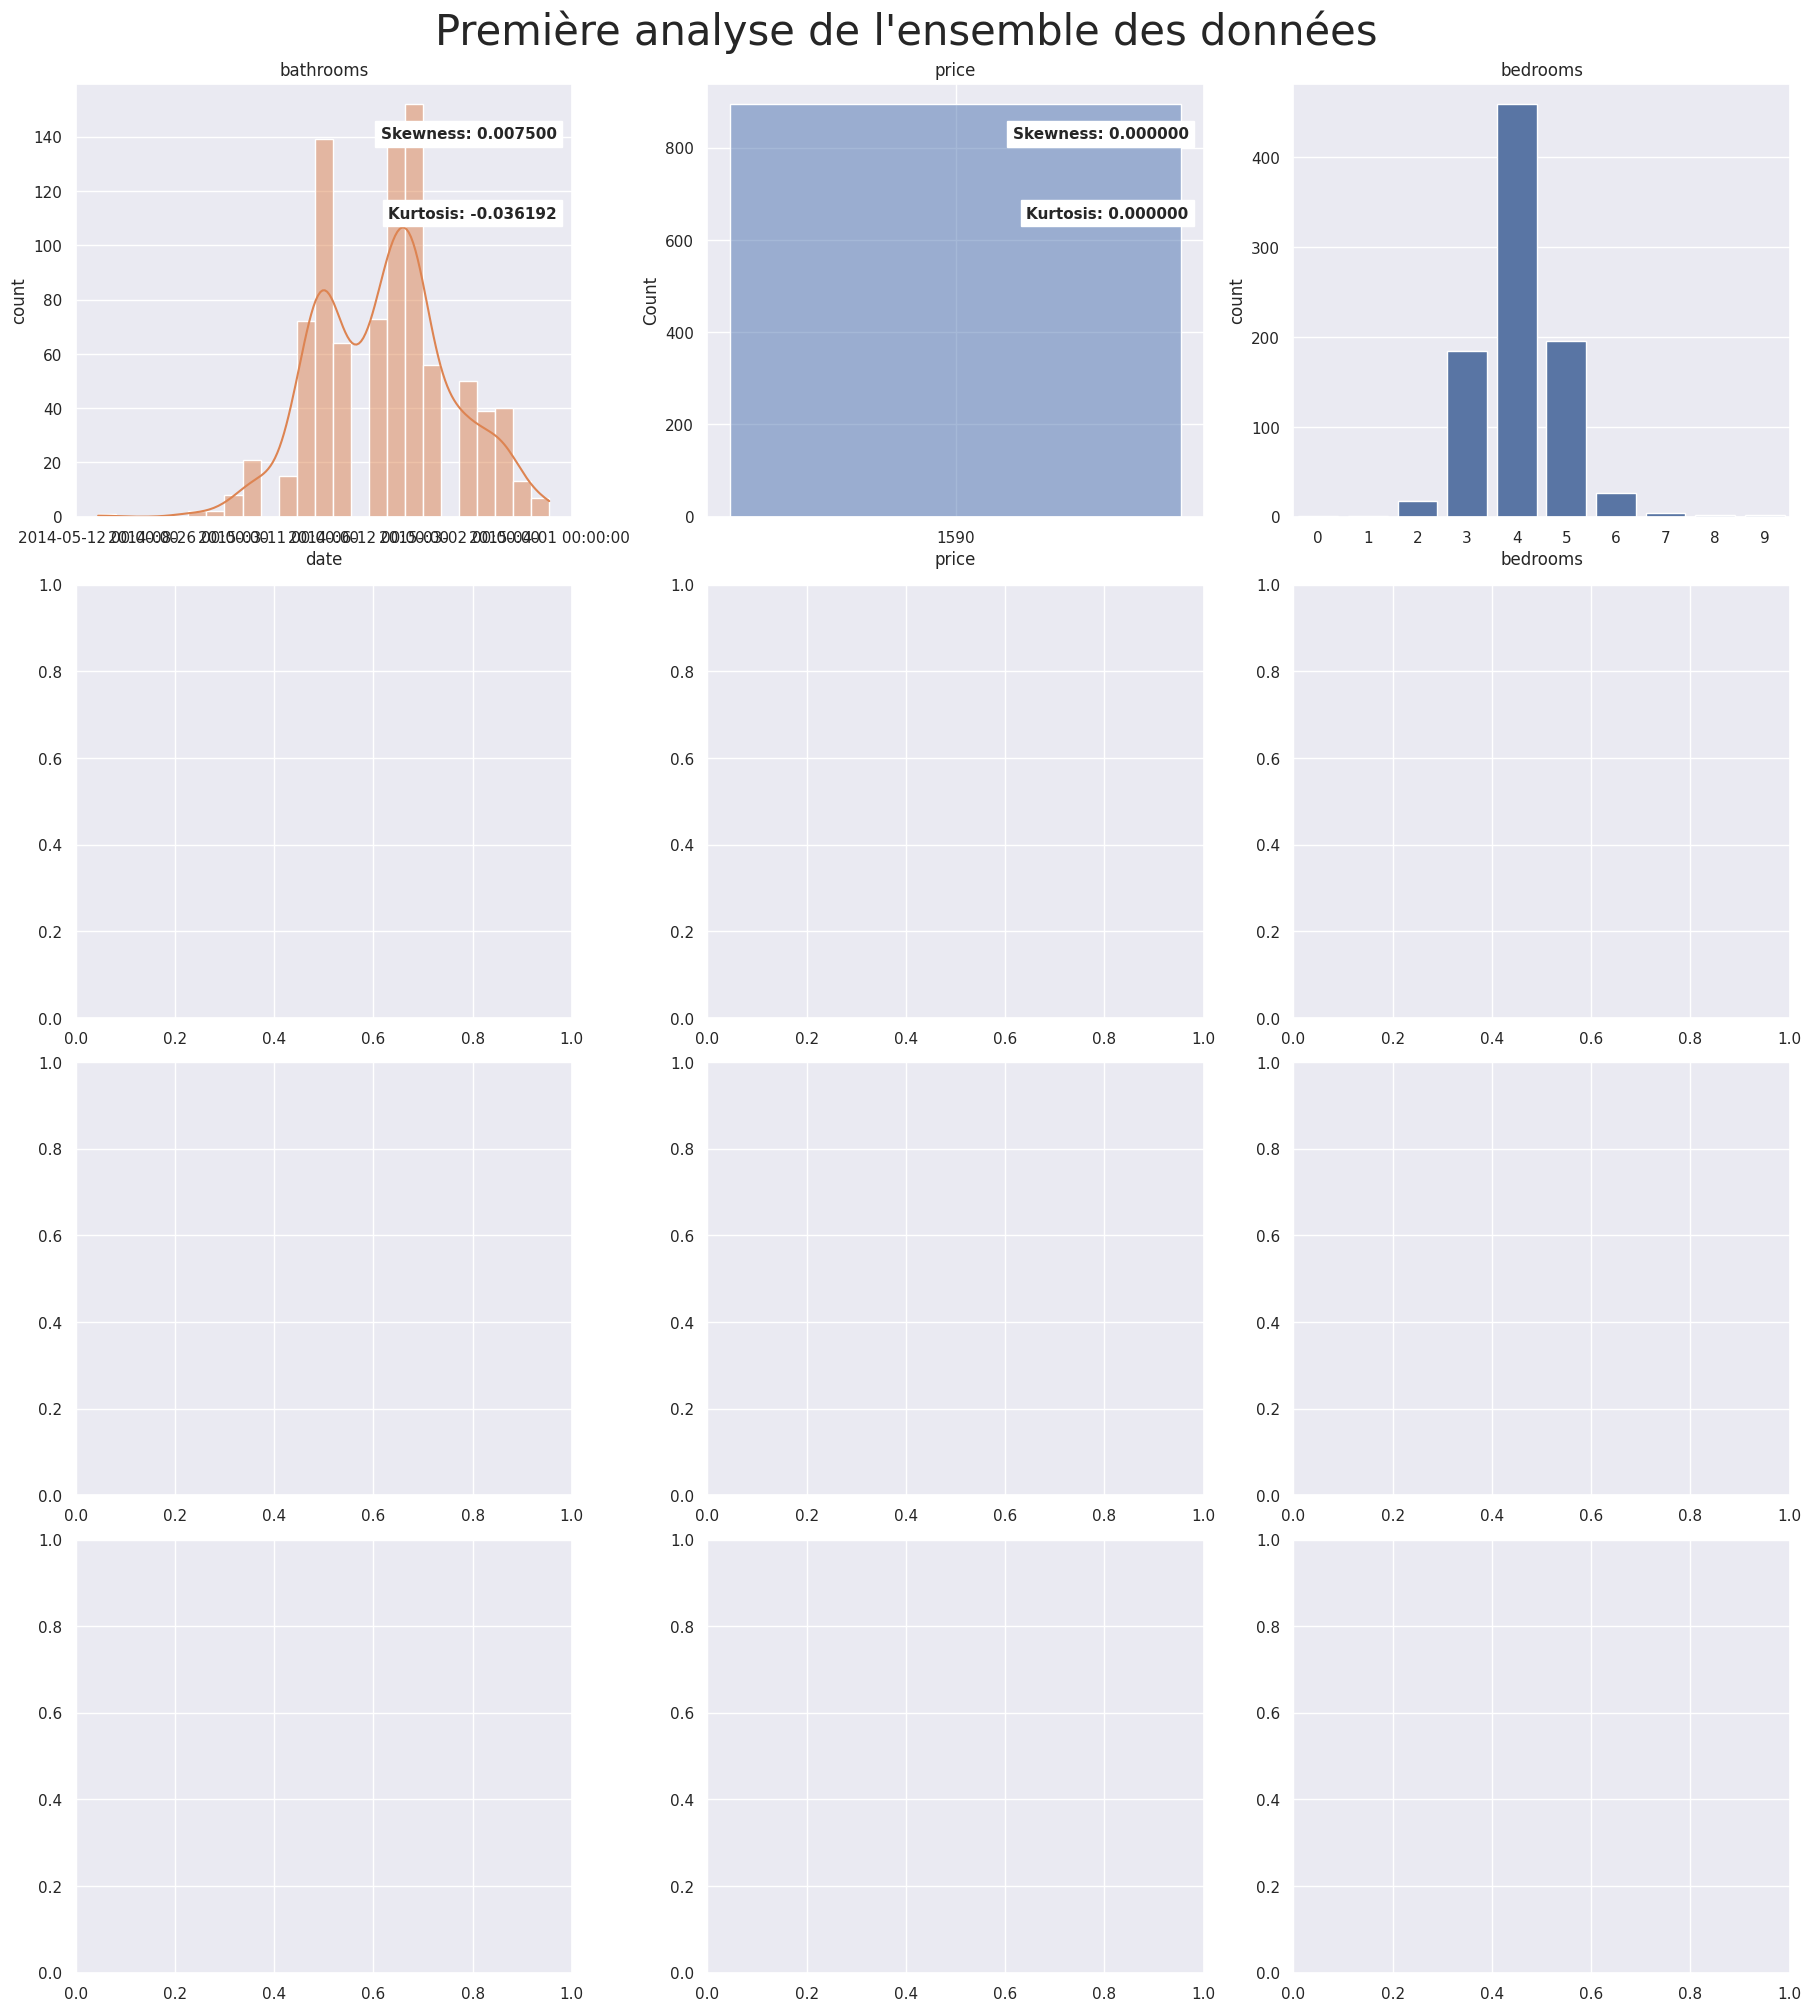

In [ ]:
columns = df.columns[1:]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20), constrained_layout=True)
plt.suptitle("Première analyse de l'ensemble des données", fontsize=30)

for i, column in enumerate(columns):
    row = i // 6
    col = i % 3

    if df[column].dtype == 'object' or df[column].dtype=='int64':
        sns.countplot(x=column, data=df, ax=axes[row, col])
        # axes[row, col].bar_label(axes[row, col].containers[0])
        axes[row, col].set_title(f'{column}')
    else:
        sns.histplot(x=column, data=df, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')

        skewness = df[column].skew()
        kurt = df[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# fig.delaxes(axes[3,2])
fig.delaxes(axes[3,2])
plt.show()


In [ ]:
df_no_unknown_0 = df.loc[(df['smoking_status'] != 'Unknown') & (df['stroke'] == 0), :]
df_no_unknown_1 = df.loc[(df['smoking_status'] != 'Unknown') & (df['stroke'] == 1), :]
df_unknown = df.loc[(df['smoking_status'] != 'Unknown'),:]


numeric_columns = df_unknown.select_dtypes(include='float').columns

plt.figure(figsize=(16, 5))
plt.suptitle("Tests de corrélation Unknown - Stroke 0 et 1", fontsize=20)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='smoking_status', y=column, data=df_unknown)
    plt.title(f'Boxplot de {column} par smoking_status')

plt.show()

for column in numeric_columns:
    groups = [group_data[column].dropna() for group, group_data in df_unknown.groupby('smoking_status')]
    f_statistic, p_value = f_oneway(*groups)

    print(f"Variable: {column}")
    print(f"Statistique F : {f_statistic}")
    print(f"p-valeur : {p_value}")
    print("")


categorical_columns = df_unknown.select_dtypes(include=['object','int']).columns
for column in categorical_columns[:-1]:
    contingency_table = pd.crosstab(df_unknown[column], df_unknown['smoking_status'])
    print("")
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    print(f"Variable catégorielle: {column}")
    print(f"Statistique du test du khi-deux d'indépendance : {chi2_stat}")
    print(f"************** p-valeur : {p_val}")
    print("")

    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(f'{column} et smoking_status')
    plt.xlabel('smoking_status')
    plt.ylabel(column)
    plt.show()


KeyError: 'smoking_status'

In [ ]:
sns.pairplot(data=df_cleaned.select_dtypes(exclude='int'),hue='smoking_status',palette=palette)

In [ ]:
custom_palette = {'Unknown': '#275375', 'formerly smoked': '#824b0d', 'never smoked': '#e08610', 'smokes': '#532e59'}

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='stroke', hue='smoking_status', data=clean_df[clean_df.stroke ==0], palette=custom_palette, ax=axs[0])
sns.countplot(x='stroke', hue='smoking_status', data=clean_df[clean_df.stroke ==1], palette=custom_palette, ax=axs[1])

axs[0].set_title('No Stroke')
axs[1].set_title('Stroke')
axs[1].legend_.remove()

plt.show()


In [ ]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

#Numerical features for distribution analysis
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot the distribution of numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



#Categorical features for distribution analysis
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot the distribution of categorical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
bins = [0, 2, 18, 35, 65, np.inf]
labels = ['Infant', 'Child', 'Young Adult', 'Adult', 'Senior']
df_age = data.copy()
df_age['age_group'] = pd.cut(df_age['age'], bins=bins, labels=labels, right=False)

sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_age["age_group"], label="age_group", kde=True)
plt.title("Distribution of age_groupLevel")

In [ ]:
# Define the labels and values for the pie plot
labels = ['No Stroke', 'Stroke']
values = data.stroke.value_counts()

# Define the explode values to separate the slices
explode = (0, 0.1)

# Plot the pie plot
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Stroke')

# Display the plot
plt.show()


In [ ]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(10, 10))
sns.histplot(data["avg_glucose_level"], label="avg_glucose_level", kde=True)
plt.title("Distribution of Average Glucose Level")


In [ ]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10, 10))
sns.histplot(data["bmi"], label="bmi", kde=True)
plt.title("Distribution of BMI")

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data,
             x="bmi", hue="stroke",
             element="step",
             stat="density", common_norm=False)
plt.title("Distribution of BMI by Stroke")
plt.show()


In [ ]:
q1, q9 = data["bmi"].quantile([0.1, 0.9])

mask = data["bmi"].between(q1, q9)
mask.head()

In [ ]:
q1, q9 = data["bmi"].quantile([0.1, 0.9])
mask = data["bmi"].between(q1, q9)
sns.boxplot(x="stroke", y="bmi" , data=data[mask])
plt.xlabel("stroke")
plt.ylabel("bmi")
plt.title("Distribution of stroke/bmi Ratio, by Class")

In [ ]:
q1, q9 = data["avg_glucose_level"].quantile([0.1, 0.9])
mask = data["avg_glucose_level"].between(q1, q9)
sns.boxplot(x="stroke", y="bmi" , data=data[mask])
plt.xlabel("stroke")
plt.ylabel("avg_glucose_level")
plt.title("Distribution of stroke/avg_glucose_level Ratio, by Class")

In [ ]:
#Randpom under sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

In [ ]:
#Random over sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

In [ ]:
#Smote sampling
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print(X_train_sm.shape)
X_train_sm.head()

In [ ]:
# Get importances
importances = model_reg.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance")

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)